# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

%matplotlib inline

In [109]:
data = pd.read_csv('../datasets/data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [110]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [111]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [112]:
y = LabelEncoder().fit_transform(y_name)

Split your data into **train** and **test** in proportion 1:4.

In [113]:
def draw_changes_metric(scores, metric):
    plt.plot(scores, 'bo-', label=metric, color='red')
    plt.ylabel('score')
    plt.xlabel('fold')
    plt.legend()
    plt.grid(True)
    plt.show()

In [114]:
def summary_train_val_test(fitted_model, X_train, X_test, y_train, y_test):
    accuracy_svm = accuracy_score(y_true=y_train, y_pred=fitted_model.predict(X_train))
    print(f'Accuracy SVM on train data: {accuracy_svm}')

    f1_svm = f1_score(y_true=y_train, y_pred=fitted_model.predict(X_train), average='weighted')
    print(f'F1-score  SVM on train data: {f1_svm}')

    scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    final_score = sum(scores) / len(scores)
    print(f'Accuracy-score SVM on cross-val: {final_score}')

    draw_changes_metric(scores, 'accuracy')

    scores = cross_val_score(fitted_model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    final_score = sum(scores) / len(scores)
    print(f'F1-score SVM on cross-val: {final_score}')

    draw_changes_metric(scores, 'f1')

    predictions = fitted_model.predict(X_test)
    accuracy_svm = accuracy_score(y_true=y_test, y_pred=predictions)
    print(f'Accuracy-score SVM on test data: {accuracy_svm}')

    f1_svm = f1_score(y_true=y_test, y_pred=predictions, average='weighted')
    print(f'F1-score SVM on test data: {f1_svm}')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score.

In [116]:
kernel = 'linear'
svm = SVC(kernel=kernel, random_state=987)  #C=100
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=987)

Accuracy SVM on train data: 0.04609375
F1-score  SVM on train data: 0.0131249019989837
Accuracy-score SVM on cross-val: 0.0328125


C:\Temp\ipykernel_25852\3103889401.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores, 'bo-', label=metric, color='red')


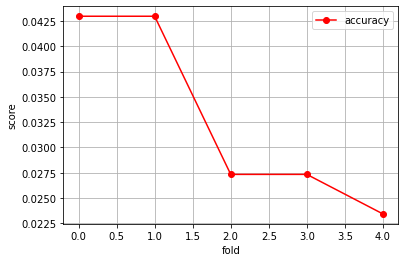

F1-score SVM on cross-val: 0.00776439957084228


C:\Temp\ipykernel_25852\3103889401.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores, 'bo-', label=metric, color='red')


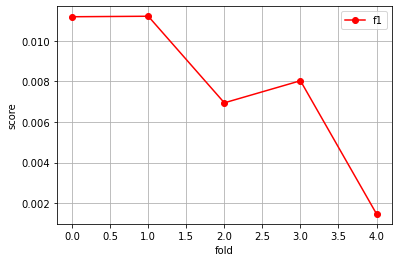

Accuracy-score SVM on test data: 0.00625
F1-score SVM on test data: 0.0075000000000000015


In [117]:
summary_train_val_test(svm, X_train, X_test, y_train, y_test)

Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=42`

In [118]:
def draw_objects(reduction_method):
    c = y[y <= 15]
    plt.scatter(reduction_method[y <= 15][:, 0], reduction_method[y <= 15][:, 1], c=c)

In [119]:
dim = 2
pca = PCA(n_components=dim, random_state=42)
pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

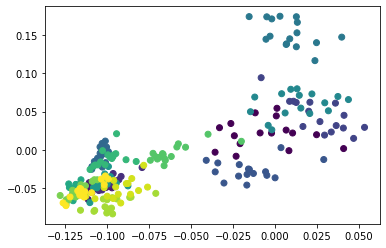

In [120]:
draw_objects(pca)

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [121]:
dim = 2
tsne = TSNE(n_components=dim, random_state=42)
tsne = tsne.fit_transform(X)

C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


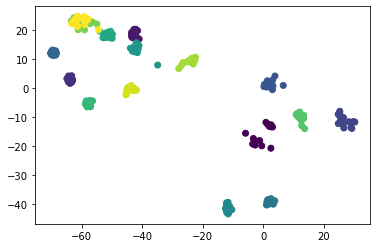

In [122]:
draw_objects(tsne)

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the TSNE method. Round the numbers to hundredths.

In [123]:
def hund_round(digit):
    hun = 2
    #hun = 10
    return np.round(digit, hun)

In [124]:
cords_1_tsne = hund_round(tsne[1])
cords_1_tsne

array([  1.53, -12.38], dtype=float32)

**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 1 (`X[1]`) after applying the PCA method. Round the numbers to hundredths.

In [125]:
cords_1_pca = hund_round(pca[1])
cords_1_pca

array([-0.02,  0.02])

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

## Ответ: *2*

Именно при TSNE reduction можно увидеть визуальное разделение. Несмотря на то, что PCA reduction тоже показывает визуально, но не показывает распределение.

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

##### TSNE и визуализирует и разбивает, выберем его.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(tsne, y, test_size=0.2, random_state=987)

In [127]:
kernel = 'linear'
svm = SVC(kernel=kernel, random_state=987)  #C=100
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=987)

Accuracy SVM on train data: 0.74765625
F1-score  SVM on train data: 0.7280160272336109
Accuracy-score SVM on cross-val: 0.6953125


C:\Temp\ipykernel_25852\3103889401.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores, 'bo-', label=metric, color='red')


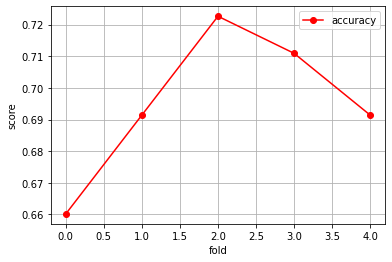

F1-score SVM on cross-val: 0.6668875698953823


C:\Temp\ipykernel_25852\3103889401.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores, 'bo-', label=metric, color='red')


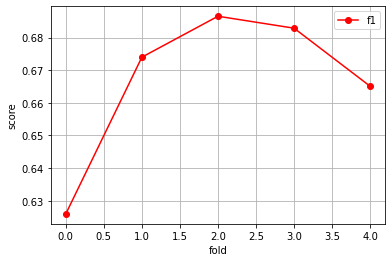

Accuracy-score SVM on test data: 0.640625
F1-score SVM on test data: 0.6183270548895549


In [128]:
summary_train_val_test(svm, X_train, X_test, y_train, y_test)

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [129]:
def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:, 0], X[:, 1], c=lables)
    ax.scatter(centers[:, 0], centers[:, 1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = list()
        for i in np.unique(self.labels):
            centers.append(X[self.labels == i].mean(axis=0))
        centers = np.array(centers)
        return centers

    def update_labels(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = X[np.random.permutation(np.arange(len(X)))[:self.n_clusters]]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1, 1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1, 1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 1

    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [130]:
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                                  cluster_std=[1.0, 0.5, 0.5],
                                  random_state=0)

In [131]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

In [132]:
# семинар 10
def plot_clusters(X, y):
    if y is not None:
        for cluster_label in np.unique(y):
            plt.scatter(X[y == cluster_label, 0],
                        X[y == cluster_label, 1],
                        label=str(cluster_label))
    else:
        plt.scatter(X[:, 0], X[:, 1], label='samples')

    plt.xlabel('X1', size=12)
    plt.ylabel('X2', size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.legend(loc='best', fontsize=12)
    plt.grid(b=1)

    plt.show()

C:\Temp\ipykernel_25852\1932402323.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1)


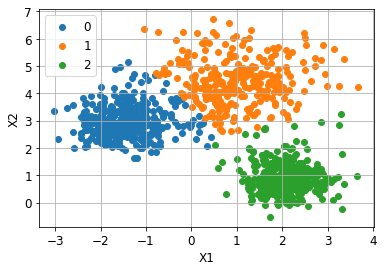

In [133]:
n_clusters = 3
n_iters = 3
my_kmeans_first = MyKMeans(n_clusters=n_clusters, n_iters=n_iters)
my_kmeans_first.fit(X)
predicted_first = my_kmeans_first.predict(X)

plot_clusters(X, predicted_first)

In [134]:
print('result label:', my_kmeans_first.labels[0], my_kmeans_first.centers[0])

result label: 0 [-1.39377578  3.02049064]


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


C:\Temp\ipykernel_25852\1932402323.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=1)


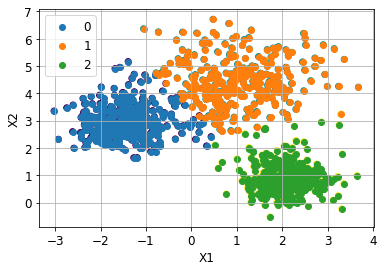

In [135]:
n_clusters = 3
n_iters = 100
my_kmeans_second = MyKMeans(n_clusters=n_clusters, n_iters=n_iters)
my_kmeans_second.fit(X)
predicted_second = my_kmeans_second.predict(X)
plot_clusters(X, predicted_second)

In [136]:
print('result label:', my_kmeans_second.labels[0], my_kmeans_second.centers[0])

result label: 0 [-1.43580108  3.00426892]


7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [137]:
num_of_changed = len(np.array([my_kmeans_first.labels != my_kmeans_second.labels]))
num_of_changed

1

**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

In [138]:
def metric_counting(metric):
    # не смог :(
    return metric

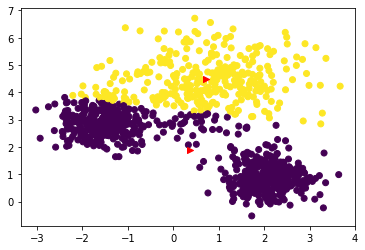

In [ ]:
metrics_list = list()
for index, cluster in enumerate(range(2, 51, 2)):
    my_kmeans = MyKMeans(n_clusters=cluster)
    my_kmeans.fit(X)
    metric = 0
    for i in np.unique(my_kmeans.labels):
        metric = metric_counting(metric)
    metrics_list.append(metric)

In [ ]:
draw_changes_metric(metrics_list, 'changes')

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

In [ ]:
eps = 0.3
dbscan = DBSCAN(eps=eps)
dbscan_preds = dbscan.fit(X)

plot_clusters(X, dbscan_preds.labels_)
print(dbscan_preds.labels_[2])

**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

In [ ]:
## your code here
choice_of_min_samples = 5  #по умолчанию 5 :)
for eps in np.arange(0.1, 0.51, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=choice_of_min_samples)
    plt.title(f'{eps = }', color='red')
    plot_clusters(X, dbscan.fit_predict(X))
    print(f'clusters {len(np.array([i for i in np.unique(dbscan.labels_) if i != -1]))}')
    print(f'outliers {len(np.array([i for i in dbscan.labels_ if i == -1]))}')
